In [ ]:
import pandas as p

In [ ]:
d = p.read_csv("retail.csv")

In [ ]:
d.head(5)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [ ]:
d.tail(5)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150
999,1000,2023-04-12,CUST1000,Male,47,Electronics,4,30,120


In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [ ]:
d.drop_duplicates()
d

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [ ]:
d.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [ ]:
d.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [ ]:
d.mode().dropna()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-05-16,CUST001,Female,43.0,Clothing,4.0,50.0,50.0


In [ ]:
d.sort_values(by = "Date")
d.head(5)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [ ]:
import matplotlib.pyplot as m
import seaborn as s

In [ ]:
d["Date"] = p.to_datetime(d["Date"])

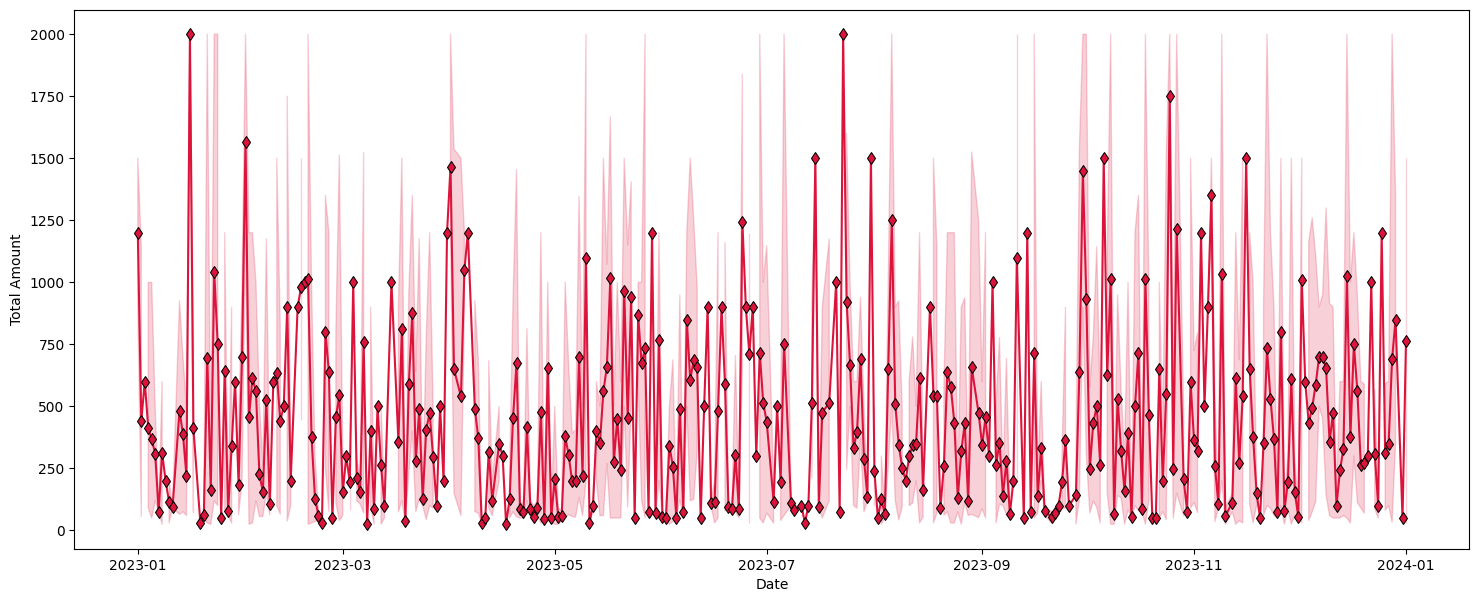

In [ ]:
m.figure(figsize = (18,7))
s.lineplot(x = "Date", y = "Total Amount", data = d, color = "crimson", marker = "d", mec = "k")
m.show()

In [ ]:
d["Month"] = d["Date"].dt.month
d["Year"] = d["Date"].dt.year

In [ ]:
Monthly_sales = d.groupby(["Year", "Month"], as_index = False)["Total Amount"].sum()
d["Monthly_sales"] = Monthly_sales["Total Amount"]

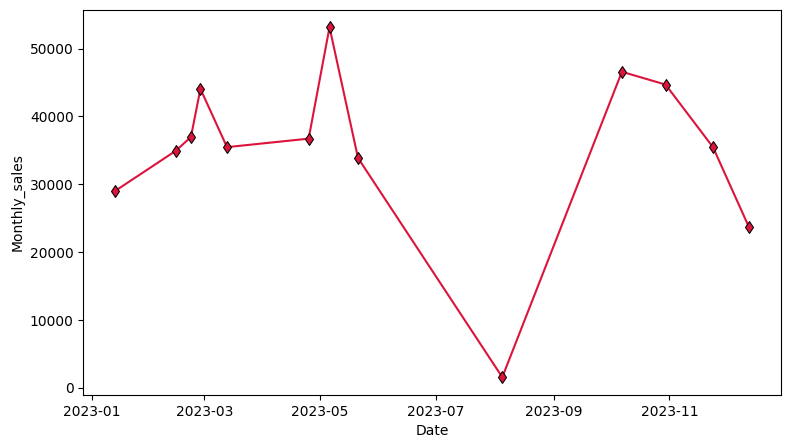

In [ ]:
m.figure(figsize = (9,5))
s.lineplot(x = "Date", y = "Monthly_sales", data = d, color = "crimson", marker = "d", mec = "k")
m.show()

In [ ]:
d = d.drop(['Month', 'Year', 'Monthly_sales'], axis = 1)
d.head(5)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [ ]:
age_bins = [10, 20, 30, 40, 50, 60]
age_labels = ["10-19", "20-29", "30-39", "40-49", "50+"]
d["Age group"] = p.cut(d["Age"], bins = age_bins, labels = age_labels, right = True)

In [ ]:
TAA = d.groupby('Age group')["Total Amount"].sum()
print("\n",TAA)


 Age group
10-19     34730
20-29     98215
30-39     95950
40-49     93795
50+      100085
Name: Total Amount, dtype: int64


In [ ]:
gd = d.groupby(['Age group', 'Product Category'])['Total Amount'].sum().reset_index()

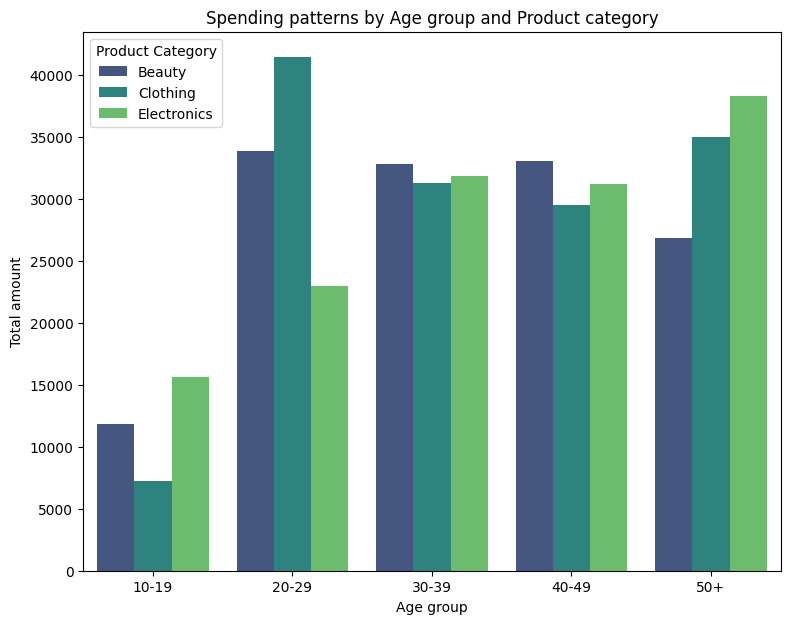

In [ ]:
m.figure(figsize = (9,7))
s.barplot(x = 'Age group', y = 'Total Amount', hue = 'Product Category', palette = 'viridis', data = gd)
m.title('Spending patterns by Age group and Product category')
m.xlabel('Age group')
m.ylabel('Total amount')
m.show()

In [ ]:
gts = d.groupby('Gender')['Total Amount'].sum().reset_index()
print("\n",gts)


    Gender  Total Amount
0  Female        232840
1    Male        223160


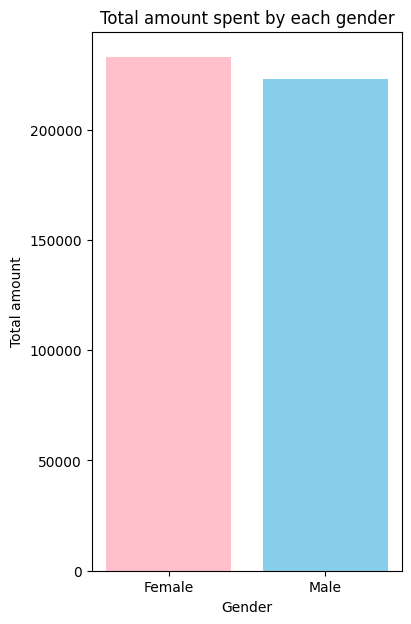

In [ ]:
m.figure(figsize = (4,7))
m.bar(gts['Gender'], gts['Total Amount'], color = ['pink', 'skyblue'])
m.title('Total amount spent by each gender')
m.xlabel('Gender')
m.ylabel('Total amount')
m.show()

In [ ]:
gp = d.groupby(['Gender', 'Product Category'])['Total Amount'].sum().reset_index()

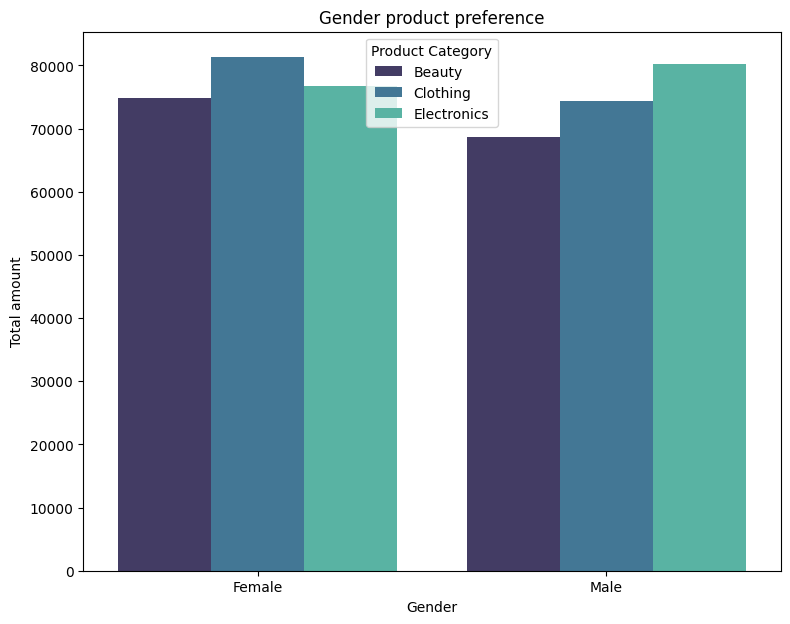

In [ ]:
m.figure(figsize = (9,7))
s.barplot(x = 'Gender', y = 'Total Amount', hue = 'Product Category', palette = 'mako', data = gp)
m.title('Gender product preference')
m.xlabel('Gender')
m.ylabel('Total amount')
m.show()

In [ ]:
avg_ag = d.groupby('Gender')['Total Amount'].mean()
print("\n",avg_ag)


 Gender
Female    456.549020
Male      455.428571
Name: Total Amount, dtype: float64


In [ ]:
tr = d.groupby('Product Category')['Total Amount'].sum().reset_index()
print("\n",tr)


   Product Category  Total Amount
0           Beauty        143515
1         Clothing        155580
2      Electronics        156905


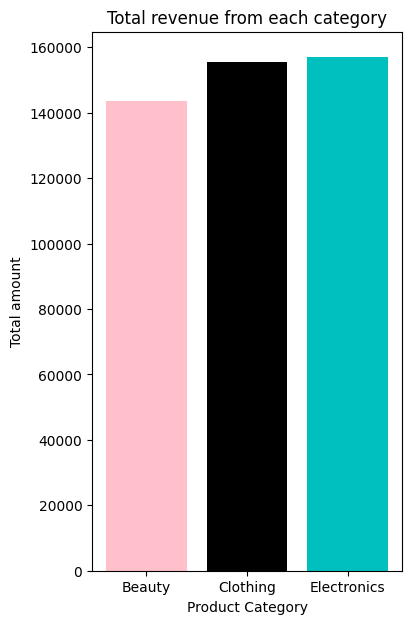

In [ ]:
m.figure(figsize = (4,7))
m.bar(tr['Product Category'], tr['Total Amount'], color = ['pink', 'k', 'c'])
m.title('Total revenue from each category')
m.xlabel('Product Category')
m.ylabel('Total amount')
m.show()

In [ ]:
tn = d.groupby('Product Category')['Quantity'].sum().reset_index()
print("\n",tn)


   Product Category  Quantity
0           Beauty       771
1         Clothing       894
2      Electronics       849
